In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
house=pd.read_csv('kc_house_data.csv')

In [5]:
house.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [6]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
house.date

0        20141013T000000
1        20141209T000000
2        20150225T000000
3        20141209T000000
4        20150218T000000
              ...       
21608    20140521T000000
21609    20150223T000000
21610    20140623T000000
21611    20150116T000000
21612    20141015T000000
Name: date, Length: 21613, dtype: object

In [33]:
house['pricing_year']=[i[:4] for i in house.date] 

In [34]:
house.pricing_year

0        2014
1        2014
2        2015
3        2014
4        2015
         ... 
21608    2014
21609    2015
21610    2014
21611    2015
21612    2014
Name: pricing_year, Length: 21613, dtype: object

In [36]:
house.pricing_year=house.pricing_year.astype('int64')

In [37]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [40]:
house['age']=house.pricing_year-house.yr_built

In [47]:
house.loc[house['yr_renovated']==0,'if_renovated']=False
house.loc[house['yr_renovated']!=0,'if_renovated']=True

In [48]:
house.if_renovated

0        False
1         True
2        False
3        False
4        False
         ...  
21608    False
21609    False
21610    False
21611    False
21612    False
Name: if_renovated, Length: 21613, dtype: object

In [60]:
plt.scatter(house.id,house.price)

In [65]:
house['pr_th']=house.price/1000

In [69]:
plt.hist(house.pr_th,bins=20)

(array([1.1041e+04, 7.9800e+03, 1.6390e+03, 5.0900e+02, 2.3300e+02,
        8.3000e+01, 5.7000e+01, 3.3000e+01, 1.6000e+01, 1.0000e+01,
        2.0000e+00, 2.0000e+00, 1.0000e+00, 3.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([  75.  ,  456.25,  837.5 , 1218.75, 1600.  , 1981.25, 2362.5 ,
        2743.75, 3125.  , 3506.25, 3887.5 , 4268.75, 4650.  , 5031.25,
        5412.5 , 5793.75, 6175.  , 6556.25, 6937.5 , 7318.75, 7700.  ]),
 <BarContainer object of 20 artists>)

In [70]:
house.pr_th.plot.box()

<AxesSubplot:>

<AxesSubplot:>

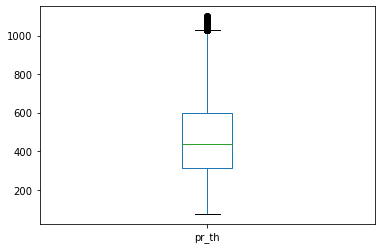

In [74]:
house[house['pr_th']<1100].pr_th.plot.box()

In [76]:
house[house['pr_th']>1100]

id             date      price  bedrooms  bathrooms  \
5      7237550310  20140512T000000  1225000.0         4       4.50   
21     2524049179  20140826T000000  2000000.0         3       2.75   
49      822039084  20150311T000000  1350000.0         3       2.50   
69     1802000060  20140612T000000  1325000.0         5       2.25   
125    4389200955  20150302T000000  1450000.0         4       2.75   
...           ...              ...        ...       ...        ...   
21568   524059330  20150130T000000  1700000.0         4       3.50   
21576  9253900271  20150107T000000  3567000.0         5       4.50   
21590  7430200100  20140514T000000  1222500.0         4       3.50   
21597   191100405  20150421T000000  1575000.0         4       3.25   
21600   249000205  20141015T000000  1537000.0         5       3.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  yr_renovated  \
5             5420    101930     1.0           0     0  ...             0   
21            3050     44867     1.0           0     4  ...             0   
49            2753     65005     1.0           1     2  ...             0   
69            3200     20158     1.0           0     0  ...             0   
125           2750     17789     1.5           0     0  ...          1992   
...            ...       ...     ...         ...   ...  ...           ...   
21568         3830      8963     2.0           0     0  ...             0   
21576         4850     10584     2.0           1     4  ...             0   
21590         4910      9444     1.5           0     0  ...             0   
21597         3410     10125     2.0           0     0  ...             0   
21600         4470      8088     2.0           0     0  ...             0   

       zipcode      lat     long  sqft_living15  sqft_lot15  pricing_year  \
5        98053  47.6561 -122.005           4760      101930          2014   
21       98040  47.5316 -122.233           4110       20336          2014   
49       98070  47.4041 -122.451           2680       72513          2015   
69       98004  47.6303 -122.215           3390       20158          2014   
125      98004  47.6141 -122.212           3060       11275          2015   
...        ...      ...      ...            ...         ...           ...   
21568    98004  47.5990 -122.197           2190       10777          2015   
21576    98008  47.5943 -122.110           3470       18270          2015   
21590    98074  47.6502 -122.066           4560       11063          2014   
21597    98040  47.5653 -122.223           2290       10125          2015   
21600    98004  47.6321 -122.200           2780        8964          2014   

       age  if_renovated   pr_th  
5       13         False  1225.0  
21      46         False  2000.0  
49      62         False  1350.0  
69      49         False  1325.0  
125    101          True  1450.0  
...    ...           ...     ...  
21568    1         False  1700.0  
21576    8         False  3567.0  
21590    7         False  1222.5  
21597    8         False  1575.0  
21600    6         False  1537.0  

[1190 rows x 25 columns]

In [77]:
house.loc[house['pr_th']>1100,'extr_expen']=True
house.loc[house['pr_th']<=1100,'extr_expen']=False

In [86]:
house.id.groupby(by=house.extr_expen).count()

extr_expen
False    20423
True      1190
Name: id, dtype: int64

In [87]:
std_house=house[house['extr_expen']==False]

In [88]:
std_house.pr_th.plot.box()

<AxesSubplot:>

In [90]:
corr_mat=std_house.corr()

<AxesSubplot:>

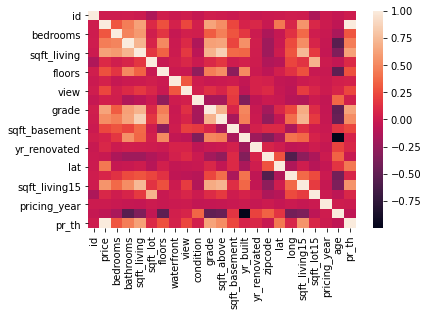

In [91]:
sns.heatmap(corr_mat)

In [92]:
corr_mat.pr_th

id               0.009799
price            1.000000
bedrooms         0.292505
bathrooms        0.453444
sqft_living      0.619334
sqft_lot         0.093859
floors           0.272899
waterfront       0.052343
view             0.233824
condition        0.037267
grade            0.628967
sqft_above       0.528593
sqft_basement    0.231117
yr_built         0.061606
yr_renovated     0.082081
zipcode         -0.019561
lat              0.432291
long             0.073373
sqft_living15    0.561160
sqft_lot15       0.082266
pricing_year     0.001469
age             -0.061576
pr_th            1.000000
Name: pr_th, dtype: float64

In [94]:
np.abs(corr_mat.pr_th).sort_values(ascending=False)

pr_th            1.000000
price            1.000000
grade            0.628967
sqft_living      0.619334
sqft_living15    0.561160
sqft_above       0.528593
bathrooms        0.453444
lat              0.432291
bedrooms         0.292505
floors           0.272899
view             0.233824
sqft_basement    0.231117
sqft_lot         0.093859
sqft_lot15       0.082266
yr_renovated     0.082081
long             0.073373
yr_built         0.061606
age              0.061576
waterfront       0.052343
condition        0.037267
zipcode          0.019561
id               0.009799
pricing_year     0.001469
Name: pr_th, dtype: float64

In [100]:
std_house.grade.plot.box()

<AxesSubplot:>

In [101]:
corr_mat.grade

id               0.030910
price            0.628967
bedrooms         0.320023
bathrooms        0.613614
sqft_living      0.703914
sqft_lot         0.092914
floors           0.456743
waterfront      -0.013107
view             0.129220
condition       -0.168344
grade            1.000000
sqft_above       0.708664
sqft_basement    0.070763
yr_built         0.492973
yr_renovated    -0.020791
zipcode         -0.185477
lat              0.084579
long             0.230517
sqft_living15    0.669910
sqft_lot15       0.101898
pricing_year    -0.036276
age             -0.493504
pr_th            0.628967
Name: grade, dtype: float64

<AxesSubplot:>

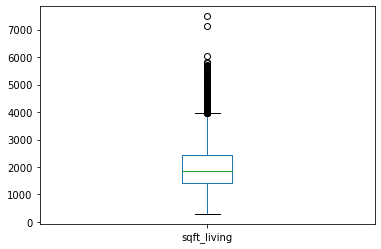

In [102]:
std_house.sqft_living.plot.box()

In [103]:
std_house.sqft_living15.plot.box()

<AxesSubplot:>

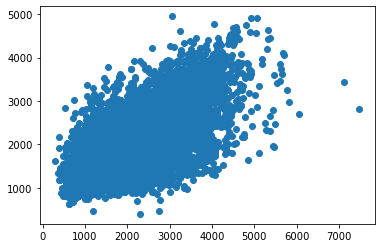

In [104]:
plt.scatter(std_house.sqft_living,std_house.sqft_living15)

In [105]:
corr_mat.sqft_living

id               0.006606
price            0.619334
bedrooms         0.583920
bathrooms        0.716485
sqft_living      1.000000
sqft_lot         0.158668
floors           0.340402
waterfront       0.002081
view             0.164304
condition       -0.073133
grade            0.703914
sqft_above       0.853286
sqft_basement    0.373529
yr_built         0.355042
yr_renovated     0.020053
zipcode         -0.205610
lat              0.010142
long             0.286518
sqft_living15    0.736953
sqft_lot15       0.172171
pricing_year    -0.032171
age             -0.355521
pr_th            0.619334
Name: sqft_living, dtype: float64

In [106]:
plt.scatter(std_house.sqft_living,std_house.pr_th)

In [128]:
X_train,X_test,y_train,y_test=train_test_split(std_house[['sqft_living']],std_house.pr_th,test_size=0.2,random_state=0)

In [129]:
X_train

sqft_living
21483         1522
10273          920
6255           800
1682          1610
20415         1630
...            ...
13845         1560
20781          680
10374         1650
11381         1420
2884          4740

[16338 rows x 1 columns]

In [121]:
model=LinearRegression()

In [130]:
model.fit(X_train,y_train)

LinearRegression()

In [131]:
model.score(X_test,y_test)

0.36123917766124525

In [156]:
std_house['decy_lat']=std_house.lat*10

<ipython-input-156-7a5d757b97c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  std_house['decy_lat']=std_house.lat*10


In [158]:
std_house.decy_lat.plot.box()

<AxesSubplot:>

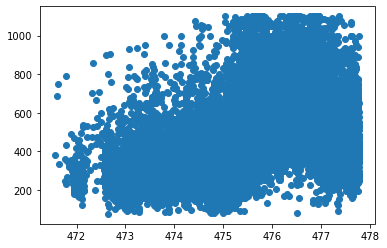

In [159]:
plt.scatter(std_house.decy_lat,std_house.pr_th)

In [160]:
X_train,X_test,y_train,y_test=train_test_split(std_house[['sqft_living','decy_lat']],std_house.pr_th,test_size=0.2,random_state=0)

In [161]:
model2=LinearRegression()

In [162]:
model2.fit(X_train,y_train)

LinearRegression()

In [163]:
model2.score(X_test,y_test)

0.5507261265305341

In [164]:
model2.score(X_train,y_train)

0.5685390096496111

##### Współczynnik R2 modelu 2. wynosi około 0.55 i jest zbliżony do siebie zarówno na wartościach treningowych jak i testowych. Model w więcej niż 50% wyjaśnia zmienność ceny domów

In [165]:
np.mean((model2.predict(X_test)-y_test)**2)**0.5

137.14123930055513

In [166]:
np.mean(std_house.pr_th)

475.60823424570447

In [167]:
(np.mean((model2.predict(X_test)-y_test)**2)**0.5)/(np.mean(std_house.pr_th))

0.2883491693916015

##### Pierwiastek średniego kwadratowego błędu predykcji modelu 2 wynosi około 29% średniej faktycznej wartości ceny

In [168]:
np.mean(((model2.predict(X_test)-y_test)/y_test)**2)**0.5

0.32053978482503204

##### Pierwiastek średniego kwadratowego względnego błędu predycji wynosi około 32% fatycznej wartości ceny

In [169]:
model2.coef_[0]

0.16520526790963166

#### Przy innych czynnikach niezmienionych, wzrost powierchni domu o 1 sqft powoduje wzrost ceny domu o 165 dolarów (0,165 tys dol) 

In [170]:
model2.coef_[1]

62.384632226633464

#### Przy innych czynnikach niezmienionych, przesunięcie lokalizacji o 0,1 stopnia na północ zwiększa cenę domu o 62 tysiące dolarów